In [1]:
# Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Getting dataset --> SOurce(Github)

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv')

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# EDA 

In [46]:
df.shape

(20640, 9)

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
df['total_bedrooms'].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [17]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [19]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [21]:
df['total_bedrooms'].fillna(280, inplace=True)

In [23]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
df.drop(columns=['ocean_proximity'], axis=1, inplace=True)

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Train test split

In [36]:
# x --> Independent columns
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [38]:
X.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252


In [42]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.20, random_state=42)

In [48]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [50]:
X_train.shape

(16512, 8)

In [52]:
y_train.shape

(16512,)

In [54]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,280.0,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,280.0,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,280.0,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,280.0,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,280.0,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850


# Feature scalling

In [59]:
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)

In [63]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

In [65]:
X_test_scaled = scaler.transform(X_test)

In [67]:
X_test_scaled

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.03030109,
        -0.37008673, -1.15508475],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.12185077,
         0.220532  , -0.70865905],
       [-1.42487026,  1.00947776,  1.85617335, ..., -0.10241931,
         1.21539643, -0.21040155],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.13944058,
         0.17853244,  2.80902421],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.17541702,
        -0.06821494, -0.57542978],
       [ 0.60445493, -0.66608108, -0.92113763, ...,  0.21507676,
        -0.13646421, -0.17259111]])

In [69]:
# Model Building

In [71]:
model = LinearRegression()

In [73]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test_scaled)

In [77]:
y_pred

array([ 45716.2715471 , 136324.27452781, 235052.87449613, ...,
       439178.19697502, 130408.85287046, 175272.25192552])

Model Performance

In [80]:
mse = mean_squared_error(y_test, y_pred)

In [82]:
mse

5097528478.380105

In [84]:
accuracy = r2_score(y_test, y_pred)

In [86]:
accuracy

0.6109971342517009

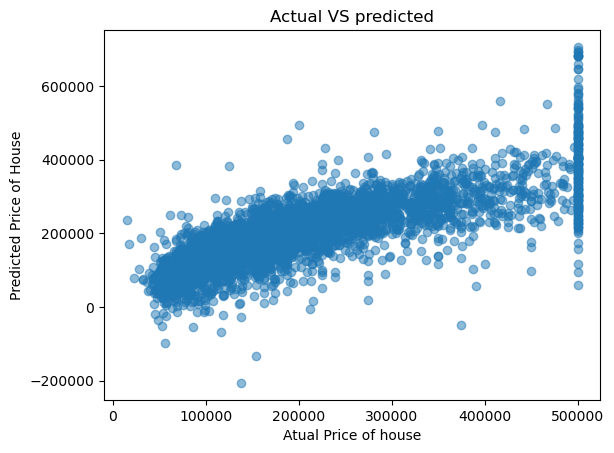

In [88]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel('Atual Price of house')
plt.ylabel('Predicted Price of House')
plt.title('Actual VS predicted')
plt.show()

In [90]:
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


Slope (m): -85503.21815336443
Intercept (c): 207194.69373788778
